# Projet : Gravitation et orbites

![Image d'un planétaire, par Birmingham Museums Trust](orrery.jpg)

Dans ce projet, vous allez étudier la physique des orbites des planètes, dont des exoplanètes. À l'échelle du système solaire, le comportement des corps célestes se décrit, à une très bonne approximation, par les lois de Newton (chapitre 2, section 3 des notes de cours) et par la force gravitationnelle (chapitre 2, section 8.1 des NoC). Avec cette liste courte de principes et d'équations, on peut, en principe, décrire avec précision l'évolution temporelle du système -- c'est-à-dire, les orbites des planètes. Cependant, des résolutions analytiques des systèmes à plusieurs corps s'avèrent difficiles, voire impossibles. On a recours, donc, à une résolution numérique.

Les compétences à acquérir sont les suivantes :

+ La physique des forces, la gravitation, les lois de Newton.
+ La manipulation des vecteurs.
+ Les changements d'unités.
+ L'analyse des données, l'ajustement d'un modèle linéaire aux données.
+ La résolution d'un problème par la méthode numérique d'itération.
+ Une compréhension des limites de la méthode, et comment évaluer son domaine de validité.

---

# 1. Introduction : Les exoplanetes, et la troisième loi de Kepler

L'astronome Kepler a identifié trois lois décrivant les orbites des planètes autour d'un astre, dont la troisième est la suivante :
$$\left( \frac{2\pi}{P} \right)^2 \, a^3 = k$$
où
$P$ est la période de révolution (techniquement, la période sidérale) de la planète,
$a$ est le demi-grand axe de la trajectoire elliptique de la planète, et
$k$ est une constante.

Newton a montré que la constante $k$ est donnée par la formule suivante :
$$k = \mathcal{G} (M+m) \approx \mathcal{G} M$$
où
$m$ est la masse de la planète,
$M$ est la masse de l'astre, et
$\mathcal{G}$ est la constante gravitationnelle : $\mathcal{G} = 6,674 \times 10^{-11} \, \mathrm{m}^3 \, \mathrm{kg}^{-1} \, \mathrm{s}^{-2}$.
L'approximation $\mathcal{G}(M+m) \approx \mathcal{G}M$ est valable dans la limite où la masse de l'astre est grande devant celle de la planète. Dans cette limite, la valeur de $k$ est identique pour toutes les planètes d'un système solaire.

Kepler étudiait notre système solaire, mais ses lois doivent s'appliquer plus largement.
La NASA a rassemblé [une base de données d'observations d'exoplanètes](https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PS),
c'est-à-dire des planètes se situant dans des systèmes solaires autres que le nôtre.
Dans le fichier ```nasa-exoplanetes.csv```, vous trouverez une fraction de ces données, dans un format adapté à la lecture par un code python.
Les données se regroupent sous la forme de quatre colonnes et plusieurs rangées (lignes).
Ces quatres colonnes représentent :

1. la période de l'orbite de la planète, $P$, en jours ;
2. le demi-[grand axe](https://fr.wikipedia.org/wiki/Grand_axe) de la trajectoire, $a$, en au ([unités astronomique](https://fr.wikipedia.org/wiki/Unit%C3%A9_astronomique)) ;
3. la masse de la planète, $m$, en unités de [masses terrestres](https://fr.wikipedia.org/wiki/Masse_terrestre_(unit%C3%A9)) (1 $M_T$ = la masse de la Terre) ;
4. la masse de l'astre, $M$, en unités de [masses solaires](https://fr.wikipedia.org/wiki/Masse_solaire) (1 $M_S$ = la masse du Soleil).

Dans cette première partie, nous allons lire et étudier ces données afin de tester la théorie de Kepler.

### Étape 1 : lecture du fichier

[Q1] En utilisant ```numpy```, lire le contenu du fichier CSV et stocker le dans un tableau (array) bidimensionnel que vous appelerez `fiche`.
(Par exemple, la méthode ```numpy.loadtxt()``` permettrait d'obtenir un tel tableau.)

In [14]:
import numpy as np
fiche=np.loadtxt("nasa-exoplanetes.csv",delimiter=",")
print(fiche)

[[3.26030000e+02 1.29000000e+00 6.16560000e+03 2.70000000e+00]
 [5.16220000e+02 1.54000000e+00 3.33707000e+03 1.80000000e+00]
 [1.85840000e+02 8.30000000e-01 1.52550000e+03 2.20000000e+00]
 [1.76641000e+03 2.83000000e+00 1.54146777e+03 9.70000000e-01]
 [7.99450000e+02 1.67600000e+00 5.56835370e+02 9.80000000e-01]
 [9.93300000e+02 2.60000000e+00 3.27350000e+03 2.30000000e+00]
 [3.03506000e+01 1.90000000e-01 2.89225300e+02 9.90000000e-01]
 [4.52800000e+02 1.33300000e+00 6.32460000e+02 1.54000000e+00]
 [8.83000000e+02 2.08000000e+00 2.73320000e+02 1.54000000e+00]
 [4.16000000e+02 9.20000000e-01 6.03877000e+02 4.80000000e-01]
 [3.35100000e+02 9.95000000e-01 3.14003000e+03 1.16000000e+00]
 [2.69300000e+02 8.70000000e-01 2.25650000e+03 1.23000000e+00]
 [4.79100000e+02 1.19000000e+00 1.23313000e+03 9.80000000e-01]
 [1.07660000e+03 2.05900000e+00 7.74865660e+02 1.01000000e+00]
 [2.28700000e+03 3.40400000e+00 1.57960720e+02 1.01000000e+00]
 [4.23078500e+00 5.27000000e-02 1.50009000e+02 1.030000

### Étape 2 : calcul

Ensuite, nous allons traiter les données, une ligne à la fois.
Pour ce faire, il vous faudra une boucle `for`.
**Pour chaque planète** (chaque ligne du tableau) :

+ [Q2] Extraire les paramètres $P$, $a$, $m$, et $M$.
+ [Q3] Calculer la valeur de $f = \frac{a^3}{P^2 M}$ et imprimer sa valeur sous une forme semblable à la suivante :
```La valeur de f de la [...]ième planète est [...] au^3 jour^-2 MS^-1```
(où vous remplacerez les ```[...]``` par des chiffres). Stocker cette valeur dans un array.

In [45]:
# [votre code ici pour Q2]
n=len(fiche)
for i in range(n):
    P=fiche[i][0]
    a=fiche[i][1]
    m=fiche[i][2]
    M=fiche[i][3]
    print("pour le ",i+1,"ième planète,P=",P,",a=",a,",m=",m,",M=",M)
# [votre code ici pour Q3, utilisant une boucle 'for']
import numpy as np
valeur_f=[]
for i in range(n):
    P=fiche[i][0]
    a=fiche[i][1]
    m=fiche[i][2]
    M=fiche[i][3]
    f=a**3/((P**2)*M)
    valeur_f += [f]
    print("La valeur de f de la ",i+1,"ième planète est",f,"au^3 jour^-2 MS^-1")
print(valeur_f)

pour le  1 ième planète,P= 326.03 ,a= 1.29 ,m= 6165.6 ,M= 2.7
pour le  2 ième planète,P= 516.22 ,a= 1.54 ,m= 3337.07 ,M= 1.8
pour le  3 ième planète,P= 185.84 ,a= 0.83 ,m= 1525.5 ,M= 2.2
pour le  4 ième planète,P= 1766.41 ,a= 2.83 ,m= 1541.46777 ,M= 0.97
pour le  5 ième planète,P= 799.45 ,a= 1.676 ,m= 556.83537 ,M= 0.98
pour le  6 ième planète,P= 993.3 ,a= 2.6 ,m= 3273.5 ,M= 2.3
pour le  7 ième planète,P= 30.3506 ,a= 0.19 ,m= 289.2253 ,M= 0.99
pour le  8 ième planète,P= 452.8 ,a= 1.333 ,m= 632.46 ,M= 1.54
pour le  9 ième planète,P= 883.0 ,a= 2.08 ,m= 273.32 ,M= 1.54
pour le  10 ième planète,P= 416.0 ,a= 0.92 ,m= 603.877 ,M= 0.48
pour le  11 ième planète,P= 335.1 ,a= 0.995 ,m= 3140.03 ,M= 1.16
pour le  12 ième planète,P= 269.3 ,a= 0.87 ,m= 2256.5 ,M= 1.23
pour le  13 ième planète,P= 479.1 ,a= 1.19 ,m= 1233.13 ,M= 0.98
pour le  14 ième planète,P= 1076.6 ,a= 2.059 ,m= 774.86566 ,M= 1.01
pour le  15 ième planète,P= 2287.0 ,a= 3.404 ,m= 157.96072 ,M= 1.01
pour le  16 ième planète,P= 4.23078

[Q4] Que constatez-vous ?


_(vos observations ici)_
les valeurs sont presque les mêmes.

[Q5] Calculer la moyenne et l'écart-type de l'ensemble de vos valeurs de $f$
(en utilisant ```numpy.mean()``` et ```numpy.std()``` ou autrement).

In [16]:
# [votre code ici pour Q5]
array_f=np.array(valeur_f)
a=np.mean(array_f)
b=np.std(array_f)
print(a)
print(b)

7.640773383919017e-06
4.375324460955931e-07


### Étape 3 : graphique

Il convient de visualiser des données sous forme d'un graphique.

[Q6] Pour chaque planète, calculer les deux quantités suivantes. Stockez-les dans des arrays (un array pour les $x$, un autre pour les $y$).

+ les abscisses $x = P^2 M$
+ les ordonnées $y = a^3$

et puis tracer un nuage de points (en utilisant ```matplotlib.pyplot.scatter()``` ou autrement). N'oubliez pas d'ajouter un titre et nommer vos axes (avec les bonnes unités).

[2.86998014e+05 4.79669559e+05 7.59803123e+04 3.02659816e+06
 6.26337896e+05 2.26928325e+06 9.11947331e+02 3.15742874e+05
 1.20072106e+06 8.30668800e+04 1.30258732e+05 8.92026627e+04
 2.24946074e+05 1.17065824e+06 5.28267269e+06 1.84365280e+01
 1.95349138e+02 1.77262596e+03]
[2.14668900e+00 3.65226400e+00 5.71787000e-01 2.26651870e+01
 4.70784378e+00 1.75760000e+01 6.85900000e-03 2.36859304e+00
 8.99891200e+00 7.78688000e-01 9.85074875e-01 6.58503000e-01
 1.68515900e+00 8.72909138e+00 3.94428833e+01 1.46363183e-04
 1.45827410e-03 1.33120530e-02]


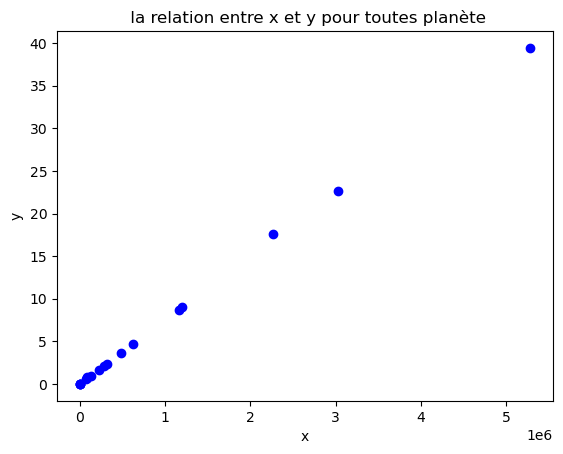

In [17]:
# [votre code ici pour Q6]
import numpy as np
valeur_x=[]
valeur_y=[]
n=len(fiche)
for i in range(n):
    P=fiche[i][0]
    a=fiche[i][1]
    m=fiche[i][2]
    M=fiche[i][3]
    x=P**2*M
    y=a**3
    valeur_x += [x]
    valeur_y += [y]
Xarray=np.array(valeur_x)
Yarray=np.array(valeur_y)
print(Xarray)
print(Yarray)

import matplotlib.pyplot as plt
plt.scatter(valeur_x,valeur_y,color="blue")
plt.title(" la relation entre x et y pour toutes planète")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Étape 4 : ajustement et interpretation

[Q7] Effectuer un ajustement linéaire aux données (avec ```numpy.polyfit()``` ou autrement).
Dessiner un graphique incluant la fonction ajustée et les données (sous forme d'un nuage de points).

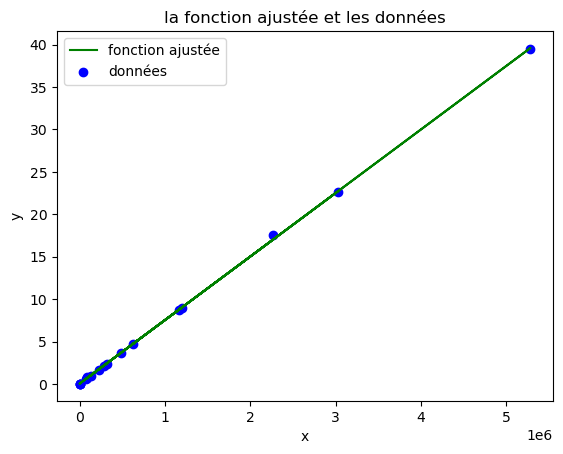

In [18]:
# [votre code ici pour Q7]
import numpy as np
import matplotlib.pyplot as plt
coefficients = np.polyfit(valeur_x,valeur_y,1)
a,b=coefficients
y_fit=a*Xarray+b
plt.plot(Xarray,y_fit,label="fonction ajustée",color="green")
plt.scatter(Xarray,valeur_y,label="données",color="blue")
plt.title("la fonction ajustée et les données")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

[Q8] Commenter l'ajustement. (Les données, sont-elles cohérentes avec la fonction ?)

[Q9] Selon la loi de Kepler, la droite passe par l'origine. Est-ce bien le cas ? (L'ordonnée à l'origine, est-elle cohérente avec zéro ?) Que vaut le coefficient directeur de la droite ? Est-il cohérent avec la moyenne calculée précédemment ?

(vos observations ici pour Q8 et Q9)_
Q8:Les données ont été fournies et l'ajustement q été effectué à l'qide de polyfit, où la méthode des moindres carrés a été utilisée
Q9:Non, car en réalité, le m ne peut pas être ignoré, donc y=(G*M*P**2+Gm*P**2)/(2*pi)**2.L'ordonnée à l'origine n'est pas 0 ".lecoefficient directeur est G/(2*pi)**2 et il est même que la moyenne cqlculée précéedemment,

**Pour aller plus loin :** [Q10] Le coefficient directeur de la droite, est-il cohérent avec la théorie ?
 * Attention, cette question Q10 nécessite un peu de travail. Les équations de l'introduction ci-dessus permettent de determiner la valeur théorique, en fonction de constantes connues (G et pi). Cependant, G s'exprime en unités SI ($\mathrm{m}^3~\mathrm{kg}^{-1}~\mathrm{s}^{-1}$), mais le coefficient directeur s'exprime en d'autres unités (au, jours, masses solaires). Il faudra passer d'un système d'unités à l'autre. Pour ce faire, posez-vous les questions suivantes : Combien de mètres vaut 1au (une unité astronomique) ? Combien de s vaut un jour ? Combien de kg vaut la masse solaire $M_S$ ?

In [37]:
# [votre code ici pour Q10]
import math 
unites_m_par_AU = 1.50e11
unites_s_par_jour = 8.64e4
unites_kg_par_MS = 1.99e30

tmpKeplerValeurEnAUJourMS = coefficients[0]
unites_facteur = (unites_m_par_AU**3) * (unites_s_par_jour**(-2)) * (unites_kg_par_MS**(-1))
tmpKeplerValeurEnSI = tmpKeplerValeurEnAUJourMS * unites_facteur
tmpKeplarValeur_G_EnSi = tmpKeplerValeurEnSI * ( (2.0 * 3.14159)**2 ) 
print("La valeur ajustée du coefficient directeur, D, est ", tmpKeplerValeurEnAUJourMS, "au^3 jour^-1 MS^-1 = ", tmpKeplerValeurEnSI, "m^3 s^-2 kg^-1")
print("La valeur calculée de la constante gravitationnelle, G = D*(2pi)^2, est ", tmpKeplarValeur_G_EnSi, "m^3 s^-2 kg^-1")
tmpG = 6.674e-1
print("La valeur théorique de cette constante est ", tmpG, " le difiierence n'est pas très grand ,donc on peut penser que ils sont cohérent")

La valeur ajustée du coefficient directeur, D, est  7.4931744103594205e-06 au^3 jour^-1 MS^-1 =  1.7023899904886984e-12 m^3 s^-2 kg^-1
La valeur calculée de la constante gravitationnelle, G = D*(2pi)^2, est  6.720754943427013e-11 m^3 s^-2 kg^-1
La valeur théorique de cette constante est  0.6674  le difiierence n'est pas très grand ,donc on peut penser que ils sont cohérent


_(vos observations ici pour Q10)_

---

# 2. Modélisation simple d'un système simple

## 2.1 : Introduction

Rappelons la loi de Newton (le principe fondamental de la dynamique):
$$m_{\mathrm{tot}} \frac{\mathrm{d}\vec{v}_C}{\mathrm{d}t} = \vec{F}_{\mathrm{tot}}$$
où
$m_{\mathrm{tot}}$ est la masse totale d'un système,  
$\vec{v}_C$ est la vitesse (vectorielle) du centre de masse $C$ du système, et  
$\vec{F}_{\mathrm{tot}}$ est la résultante des forces extérieures qui s'appliquent sur le système.

Rappelons également comment calculer la force gravitationnelle entre deux corps :
$$\vec{F}_{A\to B} = -\mathcal{G} \frac{m_A m_B}{||\vec{AB}||^2} \vec{u}_{AB}$$
où
$\vec{F}_{A\to B}$ est la force exercé par un corps (ou un système d'objets) $A$ de masse $m_A$ sur un corps $B$ de masse $m_B$,  
$\vec{AB}$ est la distance vectorielle entre les centres de masse des deux corps,  
$\mathcal{G}$ est la constante gravitationnelle,  et
$\vec{u}_{AB}$ est le vecteur unitaire de la distance entre les deux corps :
$$\vec{u}_{AB} = \frac{\vec{AB}}{||\vec{AB}||}$$

Nous allons mettre en oeuvre une résolution numérique de ces équations.
Nous étudierons d'abord des systèmes suffisamment simples qu'ils permettent
aussi des résolutions _analytiques_. L'intérêt est de comparer les deux approches
afin de valider l'approche numérique et de comprendre ses limites.

![Illustration des vecteurs](fig-vecteurs-1.png)

Vous trouverez ci-dessus une illustration des vecteurs pour les deux corps A et B.
Noter que les deux forces $\vec{F}_{A\to B}$ et $\vec{F}_{B\to A}$ sont de normes
identiques mais de sens opposés ; dans le cas de la gravitation, elles dirigent
A vers B et, inversement, B vers A. Noter en plus que nous n'avons à aucun point
indiqué les vitesses des deux corps, car les forces gravitationnelles ne dépendent pas d'eux
(s'expriment uniquement en fonction des masses et de la distance vectorielle $\vec{AB}$).
Par exemple, voici **une configuration possible** des vecteurs vitesses $\vec{v}_A$ et $\vec{v}_B$ :

![Illustration des vecteurs](fig-vecteurs-2.png)

## 2.2 : Calculer la distance et la force entre deux corps

Un vecteur en trois dimensions, par exemple la vitesse du corps $A$, peut se représenter sous la forme de trois nombres.
Dans ce projet, nous utiliserons les coordonnées cartésiennes $\vec{x} = (x,y,z)$, et nous représenterons des vecteurs en python par des objets `numpy.array`.

Nous aurons besoin, à plusieurs reprises, de calculer la distance vectorielle (vecteur déplacement) entre deux points, et d'en déduire sa norme et sa direction. Par exemple :

In [20]:
import numpy
import math

# Nous définissons deux vecteurs, qui répresentent des positions de deux objets :
exempleVecA = numpy.array([0.0, 0.0, 1.0]) # en mètres
exempleVecB = numpy.array([0.0, 2.0, 1.0]) # en mètres

# Nous calculons le vecteur déplacement :
exempleVecDiff = exempleVecB - exempleVecA # en mètres
# Le produit scalaire de cette différence avec elle-même (la magnitude au carré) :
exempleVecDiffMagCarre = exempleVecDiff.dot(exempleVecDiff) # en m^2
# La magnitude :
exempleVecDiffMag = math.sqrt(exempleVecDiffMagCarre) # en mètres
# Le vecteur unitaire associé :
exempleVecDiffUnitaire = exempleVecDiff / exempleVecDiffMag # sans unités

[Q11] Muni de ces outils, écrire une fonction python qui calcule la force vectorielle entre deux corps A et B, dont les positions sont `xA` et `xB` (deux objets de type numpy.array), et dont les masses sont `mA` et `mB`. La force étant un vecteur, la fonction doit renvoyer un numpy.array. Vous pouvez utiliser la trame suivante :

```python
def forceGravitationnelle(xA, xB, mA, mB):
    # votre code ici
    F = [...] # vous calculez la force
    return F
```

In [21]:
# [votre code ici pour Q11]
def forceGravitationnelle(xA, xB, mA, mB):
    G=6.674e-11
    vecteur_AB=xB-xA
    vecteur_ABMagCarre = vecteur_AB.dot(vecteur_AB)
    vecteur_ABMag = math.sqrt(vecteur_ABMagCarre)
    vecteur_ABUnitaire = vecteur_AB / vecteur_ABMag
    F= (-G*mA*mB / vecteur_ABMagCarre)*vecteur_ABUnitaire
    return F

Il est une bonne pratique de tester et de vérifier le code que l'on vient d'écrire. Dans l'exemple ci-dessus, nous avons défini deux objets séparés d'une distance de deux mètres dans la direction $+y$. Soient leurs masses 1kg. On peut calculer la norme de la force (on obtient $1,6685 \times 10^{-11} \, \mathrm{kg} \, \mathrm{m} \, \mathrm{s}^{-2}$).
Et l'orientation ? $\vec{F}_{A\to B}$ est la force exercé par A sur B, c'est-à-dire la force subie par B ; la force gravitationnelle étant attractive, elle va diriger B vers A, donc dans la direction $-y$, c'est-à-dire $(0, -1, 0)$. Est-ce bien le cas ? Le code ci-dessous effectuera ce test (après que vous avez défini la fonction `forceGravitationelle` dans la Q11 ; si vous avez choisi un autre nom, il faudrait faire une modification correspondante) :

```python
exempleForce = forceGravitationnelle(exempleVecA, exempleVecB, 1.0, 1.0)
exempleForceMagnitude = math.sqrt(exempleForce.dot(exempleForce))
print("La force est", exempleForce, "kg m s^{-2}.")
print("Sa magnitude vaut ", exempleForceMagnitude, "kg m s^{-2}")
print("Son vecteur unitaire est", exempleForce/exempleForceMagnitude)
```

[Q12] Ajouter ces lignes de code et effectuer ce test. Si tout est correct, le résultat de ce test simple devrait se ressembler à la suivante :

```
La force est [-0.0000e+00 -1.6685e-11 -0.0000e+00] kg m s^{-2}.
Sa magnitude vaut  1.6685e-11 kg m s^{-2}
Son vecteur unitaire est [-0. -1. -0.]
```

In [22]:
# [votre code ici pour Q12]
import numpy
import math
exempleVecA=numpy.array([0.0, 0.0, 0.0])
exempleVecB=numpy.array([0.0,1.0,0.0])
exempleForce = forceGravitationnelle(2*exempleVecA, 2*exempleVecB, 1.0, 1.0)
exempleForceMagnitude = math.sqrt(exempleForce.dot(exempleForce))
print("La force est", exempleForce, "kg m s^{-2}.")
print("Sa magnitude vaut ", exempleForceMagnitude, "kg m s^{-2}")
print("Son vecteur unitaire est", exempleForce/exempleForceMagnitude)

La force est [-0.0000e+00 -1.6685e-11 -0.0000e+00] kg m s^{-2}.
Sa magnitude vaut  1.6685e-11 kg m s^{-2}
Son vecteur unitaire est [-0. -1. -0.]


## 2.3 : Premier jet : un champ gravitationnel statique

Ayant écrit et testé ces outils, nous pouvons ensuite simuler un système plus intéressant !
On considère un système constitué du Soleil (corps A) et de la Terre (corps B).
Nous souhaitons modéliser le trajet de la Terre autour du Soleil.
Dans ce premier exercice, le Soleil est supposé fixe et immobile à l'origine.

La masse du Soleil vaut $1,9885 \times 10^{30} \, \mathrm{kg}$.
La masse de la Terre vaut $5,972 \times 10^{24} \, \mathrm{kg}$.

### Exercice : calculer la force subie par la Terre

À t=0 (c'est-à-dire dans les conditions initialles), la Terre se trouve à une distance 
$d_0 = 149 \, 596 \, 006 \, \mathrm{km}$
du Soleil.
On place la Terre à $x_B = (d_0, 0, 0)$. Le soleil est forcément à $x_A = (0,0,0)$.

[Q13] Utiliser votre fonction pour évaluer la force gravitationnelle (vectorielle) subie par la Terre à cet instant, en unités SI.

In [23]:
# [votre code ici pour Q13]
mSoleil = 1.9885e+30 # en kg
time = 365.25 * 24.0 * 3600.0 # en s
G = 6.674e-11
omegaCube = 2.0 * math.pi * G * mSoleil / time
omega = omegaCube ** (1.0/3.0)
Rayon = G * mSoleil / (omega*omega)
print("Dans le cas d'une orbite circulaire de durée d'un an, r =", Rayon, "metres et v =", omega, "m/s")

Dans le cas d'une orbite circulaire de durée d'un an, r = 149596005905.28522 metres et v = 29784.883080995933 m/s


[Q14] Ensuite, faites le calcul vous-même (sur papier, ou avec une calculatrice) et vérifiez que vos deux valeurs sont cohérentes.

_(vos observations ici pour Q14)_
il est cohérentes.

## 2.4 : L'évolution du système

Mais la Terre ne va pas rester à cette position initiale : elle se déplace ! Nous calculerons son trajet en suivant une approche numérique itérative, en faisant une série de calculs par pas de temps $dt$.

Supposons que le pas $dt$ soit suffisamment court pour que la réponse du système soit linéaire, c'est-à-dire

$$\vec{x}_B(t + dt) = \vec{x}_B(t) + d\vec{x} = \vec{x}_B(t) + \vec{v}_B(t) dt$$
$$\vec{v}_B(t + dt) = \vec{v}_B(t) + d\vec{v} = \vec{v}_B(t) + \vec{a}_B(t) dt$$

où $\vec{x}_B(t)$ est la position de la Terre au temps $t$, $\vec{v}_B(t)$ est sa vitesse, et $\vec{a}_B(t)$ est son accéleration.
On procède comme suite :

- On définie les conditions initiales : les valeurs des paramètres $\vec{x}_B(t)$ et $\vec{v}_B(t)$ à $t=0$.
- On calcule $\vec{F}_{A\to B}(t)$ et ainsi $\vec{a}_B(t)$ à $t=0$.
- Sachant la vitesse et l'accéleration à $t=0$, on calcule les paramètres à $dt$ : $\vec{x}_B(dt)$ et $\vec{v}_B(dt)$. On en déduit la force et ainsi l'accéleration à $t=dt$.
- Avec ces nouvelles valeurs à $t=dt$, on calcule les paramètres à $t=2dt$.
- Avec ces nouvelles valeurs à $t=2dt$, on calcule les paramètres à $t=3dt$.
- (etc)
 
Voici une illustration de l'approche (avec un pas plutôt grossier). À chaque point $i=0,1,...,6$, on détermine la position ($\vec{x}_i$), la vitesse ($\vec{v}_i$), et la force subie ($\vec{F}_i$). Notez que, par exemple, on calcule $\vec{x}_1 = \vec{x}_0 + \vec{v}_0 dt$ et non avec une formule trigonométrique.

![Illustration des vecteurs](fig-vecteurs-4.png)
 
Ceci est une approche itérative. Parce que nous allons refaire les calculs de nombreuses fois, nous aimerions écrire un bloc de code réutilisable dans des boucles.

### Exercice : avancer un pas

[Q15] Écrire une fonction qui prend en entrée les valeurs actuelles de `xA`, `xB`, et `vB` et un pas `dt`, qui fait avancer la position et la vitesse de la Terre d'un pas, et qui renvoie les nouvelles valeurs.
(Dans ce modèle simplifié, le Soleil reste fixe à l'origine. Parce qu'il ne bouge pas, nous ne précisons pas sa vitesse nulle `vA`.)
Vous pouvez utiliser la trame suivante :

```
def champStatiqueAvanceUnPas(xA, xB, vB, dt):
    # votre code ici
    nouvelle_xB = [...]
    nouvelle_vB = [...]
    return nouvelle_xB, nouvelle_vB
```

Point technique : Python traite des nombres simples (comme `dt`) un peu différemment des objets composés (comme `xB`). Selon la structure de votre code, vous pourriez avoir besoin de créer une nouvelle copie d'un vecteur avant de le manipuler, par exemple :

```
    dxB = dt * numpy.array(vB)
````

In [24]:
# [votre code ici pour Q15]
import numpy as np
mS=1.9885e+30
def forceGravitationnelle(xA, xB, mA, mB):
    G=6.674e-11
    vecteur_AB=xB-xA
    vecteur_ABMagCarre = vecteur_AB.dot(vecteur_AB)
    vecteur_ABMag = math.sqrt(vecteur_ABMagCarre)
    vecteur_ABUnitaire = vecteur_AB / vecteur_ABMag
    F= (-G*mA*mB / vecteur_ABMagCarre)*vecteur_ABUnitaire
    return F

def champStatiqueAvanceUnPas(xA, xB, vB, dt):
    dxB = dt * np.array(vB)
    nouvelle_xB = xB + dxB
    F = forceGravitationnelle(xA, xB, mS, mT)
    aB = F / mT
    nouvelle_vB = vB + dt * aB
    return nouvelle_xB, nouvelle_vB

[Q16] Ensuite, tester la fonction. Par exemple, avec une vitesse initiale de **29,78 km/s** vers $+y$ et un pas de 1s, on attend que la Terre se déplace d'environ 30km vers $+y$ lors du pas, et que sa vitesse évolue vers le Soleil (vers $-x$).
Ajouter un test et vérifier qu'il donne un résultat raisonnable.

In [25]:
# [votre code ici pour Q16]
import numpy as np
import math
mS=1.9885e+30
mT = 5.972e+24
xA=np.array([0.0,0.0,0.0])
xB=np.array([149596005905.28522,0.0,0.0])
vB=np.array([0.0,29.78e+3,0.0])
dt=1
print("Avant : xB = ", xB, "  ; vB = ", vB, " m/s")
xB2, vB2 = champStatiqueAvanceUnPas(xA, xB, vB, dt)
print("Après : xB = ", xB2, "  ; vB = ", vB2, " m/s")

Avant : xB =  [1.49596006e+11 0.00000000e+00 0.00000000e+00]   ; vB =  [    0. 29780.     0.]  m/s
Après : xB =  [1.49596006e+11 2.97800000e+04 0.00000000e+00]   ; vB =  [-5.9302336e-03  2.9780000e+04  0.0000000e+00]  m/s


## 2.5 : Point sur le choix du pas

Le pas ($dt$) n'est pas un paramètre physique : il ne correspond pas à une propriété observable du système solaire. En principe, on devrait trouver des résultats semblables pour tout choix _valable_ de dt (c'est-à-dire, pour tout choix qui valide l'hypothèse que l'évolution du système est linéaire pendant l'intervalle $dt$). Cependant, il est un paramètre de notre modèle, et un mauvais choix du pas peut fausser le résultat. En général, on veut que le pas soit le plus court possible.
Mais la précision a son prix : plus $dt$ est petit, plus le temps de calcul augmente. Un pas très, très petit peut aussi engendrer des problèmes de précision numérique. Dans ce projet, vous devrez choisir un pas adapté au problème, et étudier l'effet de la variation de sa valeur.

#### Exercice : L'orbite de la terre

On va maintentant suivre la Terre autour du Soleil. On prend des valeurs initiales suivantes : 

$$\vec{x}(t=0) = (d_0, 0, 0)$$
$$\vec{v}(t=0) = (0, v_0, 0)$$
où
$$d_0 = 149 \, 596 \, 006 \, \mathrm{km}$$
$$v_0 = 29,78 \, \mathrm{km} \, \mathrm{s}^{-1}$$

[Q17] Choisir un pas $dt$, et déterminer le nombre $N$ de pas correspondent à un an. Ensuite, utilisez votre fonction (définie dans la question 15) $N$ fois et déterminer la position de la Terre après un an.

In [31]:
# [votre code ici pour Q17, à réutiliser ensuite en étudiant les Q19-21]
import numpy as np
import math

mS=1.9885e+30
mT = 5.972e+24
def forceGravitationnelle(xA, xB, mA, mB):
    G=6.674e-11
    vecteur_AB=xB-xA
    vecteur_ABMagCarre = vecteur_AB.dot(vecteur_AB)
    vecteur_ABMag = math.sqrt(vecteur_ABMagCarre)
    vecteur_ABUnitaire = vecteur_AB / vecteur_ABMag
    F= (-G*mA*mB / vecteur_ABMagCarre)*vecteur_ABUnitaire
    return F

def champStatiqueAvanceUnPas(xA, xB, vB, dt):
    dxB = dt * np.array(vB)
    nouvelle_xB = xB + dxB
    F = forceGravitationnelle(xA, xB, mS, mT)
    aB = F / mT
    nouvelle_vB = vB + dt * aB
    return nouvelle_xB, nouvelle_vB
d0=149596006000
v0=29.78e+3
xS=np.array([0.0,0.0,0.0])
xT=np.array([d0,0.0,0.0])
vT=np.array([0.0,v0,0.0])
annee=365.25 * 24 * 3600
dT=100.0
fois=round(annee/dT)
print("il faut",fois,"fois")
for i in range(int(fois)):
    xT,vT=champStatiqueAvanceUnPas(xS, xT, vT, dT)
print ("après un an la position de la Terre est",xT,"et la viteness est ",vT)

il faut 315576 fois
après un an la position de la Terre est [1.49633190e+11 2.85593182e+08 0.00000000e+00] et la viteness est  [  -56.85068372 29776.21811479     0.        ]


_(vos remarques sur le choix de dt ici pour Q17)_

[Q18] Visualiser l'évolution temporelle de la position de la Terre.
 * Remarques : Il est convenable de pouvour visualiser ce que fait le calcul. À cette fin, vous pouvez utiliser la fonction `scatter()` de `matplotlib.pyplot`. Astuce : au lieu de dessiner un point par pas, vous pourriez dessiner un point par 1000 pas (ou 100, ou $10^4$, ou etc, en fonction de sa durée) ; [l'opération modulo](https://fr.wikipedia.org/wiki/Modulo_(op%C3%A9ration)) (`%`, le reste de la division d'entiers) pourrait vous aider. Vous pouvez ainsi utiliser un pas court sans stocker un nombre excessif de points.

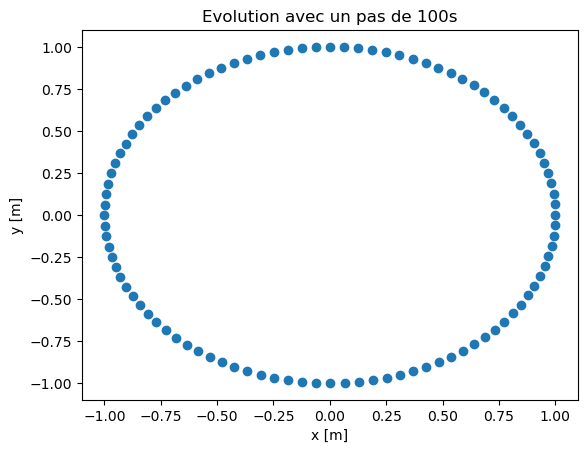

In [46]:
# [votre code ici pour Q18]
import numpy as np
import math
import matplotlib.pyplot as plt

mS=1.9885e+30
mT = 5.972e+24
def forceGravitationnelle(xA, xB, mA, mB):
    G=6.674e-11
    vecteur_AB=xB-xA
    vecteur_ABMagCarre = vecteur_AB.dot(vecteur_AB)
    vecteur_ABMag = math.sqrt(vecteur_ABMagCarre)
    vecteur_ABUnitaire = vecteur_AB / vecteur_ABMag
    F= (-G*mA*mB / vecteur_ABMagCarre)*vecteur_ABUnitaire
    return F

def champStatiqueAvanceUnPas(xA, xB, vB, dt):
    dxB = dt * np.array(vB)
    nouvelle_xB = xB + dxB
    F = forceGravitationnelle(xA, xB, mS, mT)
    aB = F / mT
    nouvelle_vB = vB + dt * aB
    return nouvelle_xB, nouvelle_vB
d0=149596006e+3
v0=29.78e+3
xS=np.array([0.0,0.0,0.0])
xT=np.array([d0,0.0,0.0])
vT=np.array([0.0,v0,0.0])
annee=365.25 * 24 * 3600
dT=100.0
fois = round(annee/dT)
pointswant = 100 
pasParPoints = round(fois / pointswant)
x_T=[]
y_T=[]
for i in range(int(fois)+1):
    xT,vT=champStatiqueAvanceUnPas(xS, xT, vT, dT)
    if i % pasParPoints == 0:
        x_T += [xT[0]/d0]
        y_T += [xT[1]/d0]
plt.scatter(x_T, y_T,label="dt = 100s")
plt.title("Evolution avec un pas de 100s")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.show()


Questions à considérer, muni de votre outil de simulation numérique :

+ [Q19] Est-ce que la Terre est revenue à son point de départ après un an ? (À quelle précision ?)
+ [Q20] Que se passe-t-il si le pas $dt$ varie ? (Vous pouvez tenter, par exemple, {10000s, 1000s, 100s, 10s, 1s} ou {1jour, 1heure, 1min, 1s}. Attention, le calcul pourrait devenir long dans le cas d'un pas court.)
+ [Q21] Que se passe-t-il après plusieurs cycles, par exemple au fil de 10 ans, ou de 100 ans ?

_(vos observations ici pour les Q19-21)_
Q19 Non
Q20 si delta t dimunue, la precision du calcul augmente. Finalement cela se rapprochera davantage de la réalite.
Q21 Plus le nombre de cycles augumente, plus le tracé se rapporche de l'orbite réelle

---

# 3. Un système à deux corps [s'il vous reste le temps nécessaire]

Dans la réalité, le Soleil n'est pas fixe et immobile (troisième loi de Newton). Parce que la force subie par la Terre dépend de la position du Soleil, ce déplacement changera l'évolution subséquente du système. Son comportement devient plus complexe : le mouvement de la Terre dépend du mouvement du Soleil, qui dépend du mouvement de la Terre.

Nous adapterons notre simulation numérique pour qu'elle tienne compte du mouvement du Soleil. Pour ce faire, nous retenons la même approche itérative ; la différence, c'est qu'il faut maintenant suivre davantage de paramètres.

[Q22] D'abord, écrire une nouvelle fonction (prennant en entrée les valeurs actuelles de `xA`, `xB`, `vA`, `vB` et un pas `dt`) qui fait avancer les positions et les vitesse d'un pas, et renvoie les nouvelles valeurs.
Vous pouvez utiliser la trame suivante :

```python
def systemeDeuxCorpsAvanceUnPas(xA, xB, vA, vB, dt):
    # votre code ici
    nouvelle_xA = [...]
    nouvelle_vA = [...]
    nouvelle_xB = [...]
    nouvelle_vB = [...]
    return nouvelle_xA, nouvelle_vA, nouvelle_xB, nouvelle_vB
```

In [43]:
# [votre code ici pour Q22]
def systemeDeuxCorpsAvanceUnPas(xA, xB, vA, vB, dt):
    dxA = dt * numpy.array(vA)
    nouvelle_xA = xA + dxA
    dxB = dt * numpy.array(vB)
    nouvelle_xB = xB + dxB
    forceA = forceGravitationnelle(xB, xA, mT, mS)
    forceB = forceGravitationnelle(xA, xB, mS, mT)
    accA = forceA / mS
    accB = forceB / mT
    nouvelle_vA = vA + dt * accA
    nouvelle_vB = vB + dt * accB
    return nouvelle_xA, nouvelle_vA, nouvelle_xB, nouvelle_vB

[Q23] Choisir les valeurs initiales des paramètres pour que le centre de masse (barycentre) du système soit (i) à l'origine, et (ii) au repos, c'est-à-dire de vitesse nulle. (Ces choix n'ont pas de signification physique, dans un sens fondamental, mais ils rendront plus simple le modèle du système.) Comme auparavant, on veut que la distance Terre-Soleil à $t=0$ soit $d_0$ et la vitesse relative à $t=0$ soit $v_0$.

_(vos remarques ici sur le choix des valeurs initiales pour Q23)_

Valeurs initiales : x= [1.49595557e+11 0.00000000e+00 0.00000000e+00] m, v= [    0.         29779.91056292     0.        ] m/s
pointsGraphiquesSouhaites= 100  and nombrePas= 315576  => pasParPointGraphique= 3156
Après 315575 pas, valeurs finales : x= [1.49632730e+11 2.91230859e+08 0.00000000e+00] m, v= [  -57.9730936  29776.12649749     0.        ] m/s


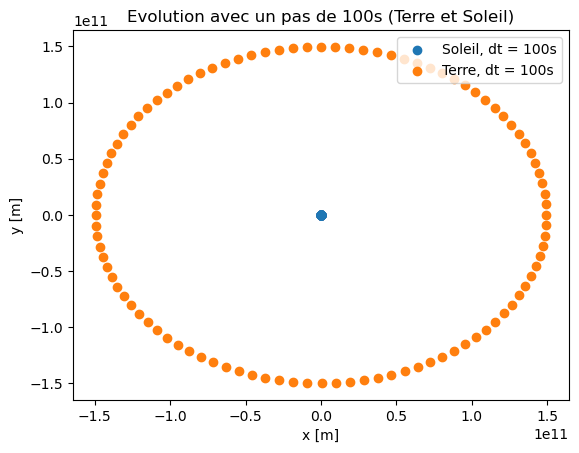

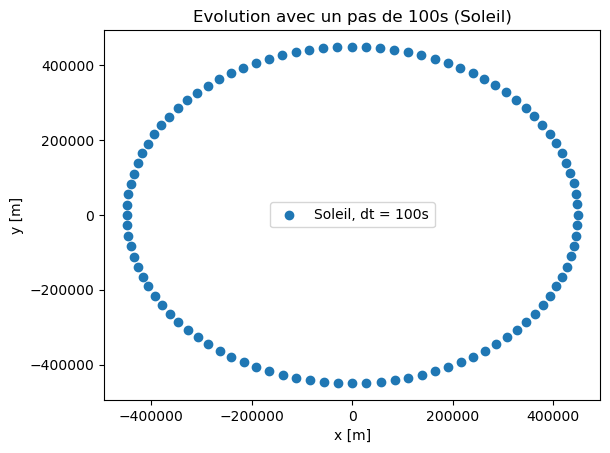

In [48]:
# [votre code ici pour Q23, à réutiliser ensuite pour Q25-26]
import matplotlib.pyplot as plt
d0 = 149596006e+3
mS=1.9885e+30
mT = 5.972e+24
dS = -(mT / (mS + mT)) * d0
dT  =  (mS / (mS + mT)) * d0
v0 = 29.78e+3
vS = -(mT / (mS + mT)) * v0
vT  =  (mS / (mS + mT)) * v0

xS = numpy.array([dS, 0.0, 0.0])
xT  = numpy.array([dT,  0.0, 0.0])
vS = numpy.array([0.0, vS, 0.0])
vT  = numpy.array([0.0, vT,  0.0])
dt = 100.0 

print("Valeurs initiales : x=", xT, "m, v=", vT, "m/s")
An = 365.25 * 24 * 3600
fois = round(An / dt)

# Préparons le graphique :
pointswant = 100
pasParPoint = round(fois / pointswant)
print("pointsGraphiquesSouhaites=",pointswant," and nombrePas=",fois," => pasParPointGraphique=",pasParPoint)
systemeDeuxCorpsVecXA = []
systemeDeuxCorpsVecYA = []
systemeDeuxCorpsVecXB = []
systemeDeuxCorpsVecYB = []

for i in range(0, fois) :
    xS, vS, xT, vT = systemeDeuxCorpsAvanceUnPas(xS, xT, vS, vT, dt)
    if (i % pasParPoint == 0):
        systemeDeuxCorpsVecXA += [xS[0]]
        systemeDeuxCorpsVecYA += [xS[1]]
        systemeDeuxCorpsVecXB += [xT[0]]
        systemeDeuxCorpsVecYB += [xT[1]]
print("Après", i, "pas, valeurs finales : x=", xT, "m, v=", vT,"m/s")
plt.scatter(systemeDeuxCorpsVecXA, systemeDeuxCorpsVecYA,label="Soleil, dt = 100s")
plt.scatter(systemeDeuxCorpsVecXB, systemeDeuxCorpsVecYB,label="Terre, dt = 100s")
plt.title("Evolution avec un pas de 100s (Terre et Soleil)")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.legend()
plt.show()


plt.scatter(systemeDeuxCorpsVecXA, systemeDeuxCorpsVecYA,label="Soleil, dt = 100s")
plt.title("Evolution avec un pas de 100s (Soleil)")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.legend()

[Q24] Ensuite, utiliser cette fonction pour calculer l'évolution du système. 

Questions à considérer :

+ [Q25] Est-ce que le système se comporte différemment du modèle simplifié ci-dessus (d'un Soleil fixe) ? Pourquoi ?
+ [Q26] Est-ce que la position et la vitesse du centre de masse sont censées varier au fil du temps ? Est-ce le cas en pratique, selon votre modèle ?

_(vos remarques ici pour Q25)_
Dans ce modèle, les mouvements du Soleil et de la Terre s'influencent mutuellement. Ainsi, le Soleil se déplace également sous l'effet de la gravité de la Terre, ce qui diffère du modèle simplifié où le Soleil est supposé fixe. Dans ce modèle simplifié, la position du Soleil est fixe et seule la trajectoire de la Terre est prise en compte, tandis que dans ce modèle, la trajectoire du Soleil affecte également le mouvement de la Terre, ce qui entraîne des trajectoires plus complexes.

_(vos remarques ici pour Q26)_
La vitesse du centre de masse devrait être nulle, à moins qu'il n'y ait des forces extérieures ou que le moment linéaire total du système change. Dans ce modèle, la position du centre de masse évolue au fil du temps, principalement en raison des interactions gravitationnelles entre le Soleil et la Terre. Bien que, dans un système idéal (si celui-ci est isolé), la position du centre de masse devrait rester constante, dans notre simulation, où nous prenons en compte les interactions entre le Soleil et la Terre, la trajectoire du centre de masse évolue au fil du temps.

In [30]:
# [votre code ici pour Q25-26, le cas échéant]

---

# Pour aller plus loin

Ci-dessous, quelques idées qui pourrait vous inspirer. La liste n'est pas exhaustive !

## Idées pour la partie 1 :

### Appliquer la troisième loi de Kepler à d'autres planètes ; incertitudes

Les données du fichier ```nasa-exoplanetes.csv``` concernent les planètes suivantes :
11 Com b,
11 UMi b,
14 And b,
14 Her b,
16 Cyg B b,
18 Del b,
24 Boo b,
24 Sex b,
24 Sex c,
2MASS J19383260+4603591 b,
30 Ari B b,
4 UMa b,
42 Dra b,
47 UMa b,
47 UMa c,
51 Peg b,
55 Cnc b,
55 Cnc c.

Vous pouvez tester sa validité avec d'autres planètes de la base de données de la NASA.
Attention : elle comprend énormément d'informations sur des milliers de planètes
(et parfois plusieurs mesures par planète).
Il n'est pas conseillé de traiter un grand nombre de planètes (pour qu'il reste un projet de physique et non d'informatique).
Par contre, il pourrait être intéressant de tester la loi de Kepler dans des conditions
extrèmes (p.ex. des planètes très massives, ou très loin de leurs astres, ou dans des systèmes à plusieurs astres).

La plupart des mesures pertinantes ont des incertitudes associées.
Pouvez-vous les inclure dans votre graphique, et/ou dans votre ajustement ?

## Idées pour les parties 2+3 :

### La méthode de Varlet

L'algorithme itératif proposé dans la partie 2.4 correspond, en effet, à la méthode d'Euler. Il souffre des imprécisions si le pas dt n'est pas très court. Un autre algorithme, plus précis, est [la méthode de Verlet](https://fr.wikipedia.org/wiki/Int%C3%A9gration_de_Verlet). Au deuxième ordre, on peut l'exprimer sous la forme suivante :

$$\vec{v}_B(t + dt) = \vec{v}_B(t) + \vec{a}_B(t) dt$$
$$\vec{x}_B(t + dt) = \vec{x}_B(t) + \left[ \frac{\vec{v}_B(t) + \vec{v}_B(t+dt)}{2} \right] dt$$

Vous pouvez mettre en comparaison la précision des deux méthodes (d'Euler et de Verlet) avec des pas grossiers, raisonnables, et fins. Les résultats, sont-ils cohérents ? Sous quelles conditions les méthodes sont-elles fiables ?

### Un modèle plus réaliste du système Terre-Soleil ; vérifications numériques de la troisième loi de Kepler (via la simulation des parties 2-3)

Les valeurs initiales du rayon et de la vitesse de la Terre (proposées dans les sections 2.3 et 2.4) ont été calculées tel qu'on obtienne une orbite quasi-circulaire ; elles correspondent bien aux valeurs expérimentales du demi-grand axe $a$ et de la vitesse _moyenne_ de [l'orbite](https://fr.wikipedia.org/wiki/Orbite_de_la_Terre). Cependant, dans la réalité l'orbite n'est pas strictement circulaire ; vous pouvez simuler l'orbite avec de valeurs plus précises de l'orbite de la Terre, ou d'une autre planète ayant une excentricité plus importante. Que vaut la période selon votre simulation ? Est-ce que cette valeur valide la troisième loi de Kepler ?

### Un système à n corps

Dans la partie 3, nous avons étudié un système à deux corps (le Soleil et la Terre). Pouvez-vous généraliser l'algorithme à plusieurs corps ? (Par exemple : le Soleil plus l'ensemble des planètes du [système solaire](https://fr.wikipedia.org/wiki/Syst%C3%A8me_solaire)). On garde l'approche itérative de base, mais à chaque itération il faudra calculer toutes les forces par paire (par exemple, la force Soleil-Terre, la force Soleil-Mars, la force Terre-Mars, ...) puis pour chaque corps calculer la somme vectorielle des forces (la résultante), puis en déduire l'accéleration, puis mettre à jour la position et la vitesse. L'orbite de la Terre, est-elle sensible à la présence des autres planètes ?

### D'autres systèmes

À l'aide de [la base de données NASA](https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PS), vous pouvez simuler l'évolution d'un système astre-exoplanète. Se comporte-il d'une manière similaire à notre système solaire ? Y-a-t'il des différences ?

----
(Image du planétaire : Birmingham Museums Trust, via [Wikimedia Commons](https://en.wikipedia.org/wiki/File:Thinktank_Birmingham_-_object_1956S00682.00001(1).jpg))